In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chess/games.csv


In [2]:
import pandas as pd

In [3]:
games = pd.read_csv('/kaggle/input/chess/games.csv')

In [4]:
games.head(10)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
5,MsoDV9wj,False,1.504240e+12,1.504240e+12,5,draw,draw,10+0,trelynn17,1250,franklin14532,1002,e4 c5 Nf3 Qa5 a3,B27,Sicilian Defense: Mongoose Variation,4
6,qwU9rasv,True,1.504230e+12,1.504230e+12,33,resign,white,10+0,capa_jr,1520,daniel_likes_chess,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10
7,RVN0N3VK,False,1.503680e+12,1.503680e+12,9,resign,black,15+30,daniel_likes_chess,1413,soultego,2108,e4 Nc6 d4 e5 d5 Nce7 c3 Ng6 b4,B00,Nimzowitsch Defense: Kennedy Variation | Link...,5
8,dwF3DJHO,True,1.503510e+12,1.503510e+12,66,resign,black,15+0,ehabfanri,1439,daniel_likes_chess,1392,e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...,C50,Italian Game: Schilling-Kostic Gambit,6
9,afoMwnLg,True,1.503440e+12,1.503440e+12,119,mate,white,10+0,daniel_likes_chess,1381,mirco25,1209,e4 d5 exd5 Qxd5 Nc3 Qe5+ Be2 Na6 d4 Qf5 Bxa6 b...,B01,Scandinavian Defense: Mieses-Kotroc Variation,4


In [5]:
games.tail(10)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
20048,dnexZDsv,True,1.499869e+12,1.499870e+12,25,resign,white,10+10,mateuslichess,1252,jamboger,1233,e4 e6 d4 d5 exd5 Qxd5 Nc3 Bb4 a3 Bxc3+ bxc3 Ne...,C01,French Defense: Exchange Variation,5
20049,7IENcPg3,True,1.499815e+12,1.499815e+12,43,mate,white,10+0,jkubb29,1328,jamboger,1252,e4 e6 Nf3 d5 Nc3 Bb4 exd5 exd5 d4 Bg4 a3 Bxc3+...,C00,French Defense: Two Knights Variation,5
20050,nYOvevdh,True,1.499814e+12,1.499814e+12,9,outoftime,white,10+0,jamboger,1243,yamaguchipolgar,1142,c4 e5 d4 exd4 Qxd4 Nf6 Bg5 Be7 e4,A20,English Opening: King's English Variation,2
20051,uMzb0TPC,True,1.499812e+12,1.499813e+12,58,mate,black,10+10,samael88,1237,jamboger,1231,e4 e6 Nf3 d5 Bb5+ Bd7 c4 c6 Ba4 Qa5 b3 b5 cxb5...,C00,French Defense: Knight Variation,3
20052,EopEqqAa,True,1.499812e+12,1.499812e+12,37,resign,white,10+10,jamboger,1219,samael88,1250,c4 e6 d4 b6 Nc3 Bb7 Nf3 g6 h4 Bg7 Bg5 f6 Bf4 d...,A40,English Defense,4
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4
20057,N8G2JHGG,True,1.499643e+12,1.499644e+12,78,mate,black,10+0,jamboger,1235,ffbob,1339,d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...,D00,Queen's Pawn Game: Mason Attack,3


In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [7]:
# Check for missing values
missing_values = games.isnull().sum()

In [8]:
missing_values

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [10]:
games.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [11]:
# Total number of games for each outcome
games['winner'].value_counts()

winner
white    10001
black     9107
draw       950
Name: count, dtype: int64

In [9]:
games.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

Data Visualization

Distribution of Winner Ratings

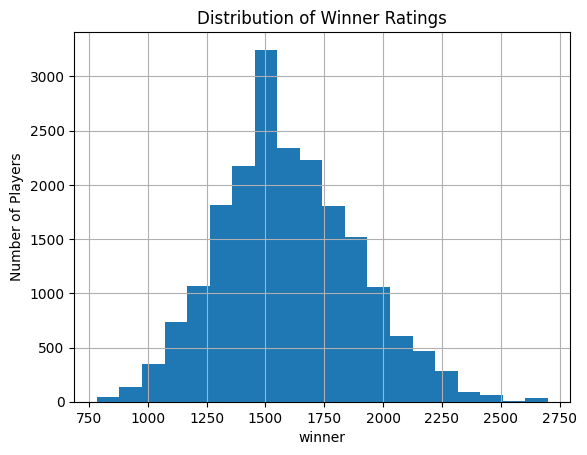

In [12]:
import matplotlib.pyplot as plt 

games['white_rating'].hist(bins=20) # Example: Histogram of player ratings
plt.xlabel('winner')
plt.ylabel('Number of Players')
plt.title('Distribution of Winner Ratings')
plt.show()

Data Preprocessing

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Example: Predicting winner based on some selected features
X = games[['white_rating', 'black_rating']] # Your selected features
y = games['winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)


Overall Win Rates

In [14]:
white_wins =  games[games['winner'] == 'white'].shape[0] / games.shape[0]
black_wins = games[games['winner'] == 'black'].shape[0] / games.shape[0]

print("White win percentage:", white_wins)
print("Black win percentage:", black_wins) 

White win percentage: 0.49860404826004584
Black win percentage: 0.45403330342008175


Win Rate by Openings

<Axes: xlabel='opening_eco'>

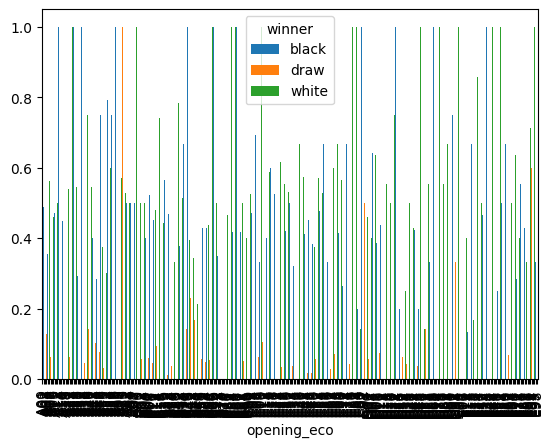

In [15]:
openings_win_rates = games.groupby('opening_eco')['winner'].value_counts(normalize=True)
openings_win_rates.unstack().plot(kind='bar')

Correlation between Openings and Victory

In [16]:
# Analysis per color
white_openings_results = games[games['winner'] == 'white'].groupby('opening_eco')['winner'].value_counts(normalize=True)
black_openings_results = games[games['winner'] == 'black'].groupby('opening_eco')['winner'].value_counts(normalize=True)

In [17]:
white_openings_results

opening_eco  winner
A00          white     1.0
A01          white     1.0
A02          white     1.0
A03          white     1.0
A04          white     1.0
                      ... 
E92          white     1.0
E94          white     1.0
E95          white     1.0
E97          white     1.0
E98          white     1.0
Name: proportion, Length: 327, dtype: float64

In [18]:
black_openings_results

opening_eco  winner
A00          black     1.0
A01          black     1.0
A02          black     1.0
A03          black     1.0
A04          black     1.0
                      ... 
E90          black     1.0
E91          black     1.0
E92          black     1.0
E94          black     1.0
E97          black     1.0
Name: proportion, Length: 317, dtype: float64